In [64]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
data_dir = './../data'

In [11]:
os.listdir(data_dir)

['brazilian-ecommerce.zip',
 'marketing-funnel-olist.zip',
 'olist_closed_deals_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_marketing_qualified_leads_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [17]:
# Load 'MQL' dataset
mql = pd.read_csv(os.path.join(data_dir, 'olist_marketing_qualified_leads_dataset.csv'),
                  parse_dates=['first_contact_date'])
# Add a 'year-month' column
mql['first_contact_date(y-m)'] = mql['first_contact_date'].dt.to_period('M')
mql.head()

,mql_id,first_contact_date,landing_page_id,origin,first_contact_date(y-m)
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018-02
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017-10
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,2018-03
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,2018-01
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2018-02


In [16]:
# Load 'closed deals' dataset
cd = pd.read_csv(os.path.join(data_dir, 'olist_closed_deals_dataset.csv'),
                 parse_dates=['won_date'])
cd.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [20]:
# Merge 'MQL' with 'closed deals'
# Merge by 'left' in order to evaluate conversion rate
mql_cd = pd.merge(mql, cd, how='left', on='mql_id')
mql_cd.head()

,mql_id,first_contact_date,landing_page_id,origin,first_contact_date(y-m),seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018-02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017-10,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,2018-03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,2018-01,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2018-02,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [26]:
# Add a column to distinguish signed MOLs from MQLs who left without signing up
mql_cd['seller_id(bool)'] = mql_cd['seller_id'].notna()


In [27]:
mql_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 19 columns):
mql_id                           8000 non-null object
first_contact_date               8000 non-null datetime64[ns]
landing_page_id                  8000 non-null object
origin                           7940 non-null object
first_contact_date(y-m)          8000 non-null period[M]
seller_id                        842 non-null object
sdr_id                           842 non-null object
sr_id                            842 non-null object
won_date                         842 non-null datetime64[ns]
business_segment                 841 non-null object
lead_type                        836 non-null object
lead_behaviour_profile           665 non-null object
has_company                      63 non-null object
has_gtin                         64 non-null object
average_stock                    66 non-null object
business_type                    832 non-null object
declared_product_catalog

In [90]:
mql_cd.groupby('lead_behaviour_profile').count()

,mql_id,first_contact_date,landing_page_id,origin,first_contact_date(y-m),seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_id(bool)
lead_behaviour_profile,,,,,,,,,,,,,,,,,,
cat,407,407,407,398,407,407,407,407,407,407,405,27,28,31,402,29,407,407
"cat, wolf",8,8,8,8,8,8,8,8,8,8,8,7,7,6,8,5,8,8
eagle,123,123,123,123,123,123,123,123,123,123,123,5,5,7,120,8,123,123
"eagle, cat",3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,2,3,3
"eagle, wolf",3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,1,3,3
shark,24,24,24,24,24,24,24,24,24,24,24,5,5,3,23,5,24,24
"shark, cat",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
"shark, wolf",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
wolf,95,95,95,93,95,95,95,95,95,95,95,13,13,13,95,15,95,95


In [83]:
mql_cd[mql_cd['seller_id(bool)'] == True].sort_values(by='landing_page_id')['lead_behaviour_profile']

3798          eagle
2350            NaN
110           eagle
2195      cat, wolf
4988            cat
4422           wolf
4241            cat
5633            cat
7493            cat
2820          eagle
854             cat
2580          shark
1988            cat
5041          eagle
366            wolf
364           shark
7461            NaN
6977            cat
5016            cat
7931            NaN
6644          eagle
6492          eagle
913             cat
3066     shark, cat
3543           wolf
5759          shark
6459          eagle
3030            cat
6363      cat, wolf
7706          shark
           ...     
5903          eagle
1310           wolf
5389            cat
5910            cat
7689    eagle, wolf
4368            cat
3660            cat
1124            cat
2961           wolf
7108            cat
7516            cat
6711            cat
6682           wolf
2262            NaN
5535            cat
6840            cat
4564            cat
7926          eagle
5404          eagle


In [31]:
mql_cd[mql_cd['seller_id(bool)'] == True].shape[0]/mql_cd.shape[0]

0.10525

In [44]:
order_items = pd.read_csv(os.path.join(data_dir, 'olist_order_items_dataset.csv'), parse_dates=['shipping_limit_date'])
order_items['total_price'] = order_items['price'] + order_items['freight_value']
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


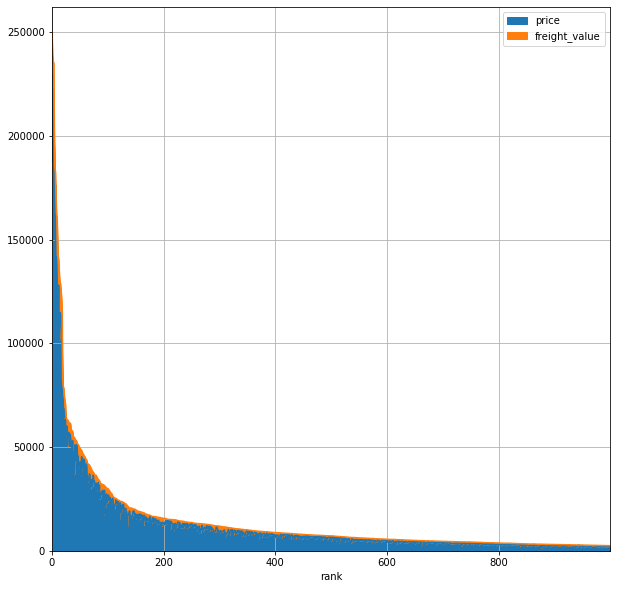

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
df_plot = order_items.groupby(['seller_id']).sum().sort_values(by=['total_price'], ascending=[False]).reset_index(drop=False).head(1000)
df_plot = df_plot.reset_index(drop=False).rename({'index': 'rank'}, axis=1)
df_plot.plot.area(x='rank', y=['price', 'freight_value'], ax=ax)
ax.grid(True)
# ax.set_xscale('log')
# ax.set_yscale('log')

Leads Input Data
- Business Segment
- Business Type
- Has Company
- Has GTIN
- Lead Behaviour Profile
- Lead Type
- 